In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###Reading and Basic Analysis

In [63]:
data = pd.read_csv('/content/medical_examination.csv')
data.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.nunique()

,0
id,70000
age,8076
sex,3
height,109
weight,287
ap_hi,153
ap_lo,157
cholesterol,3
gluc,3
smoke,2


###Validating Data

In [64]:
data['overweight'] = (data['weight'] / (data['height'] / 100)**2) > 25
data['cholesterol'] = data['cholesterol'] != 1
data['gluc'] = data['gluc'] != 1
data['inactive'] = data['active'] != 1
data = data.drop('active', axis=1)
data.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,overweight,inactive
0,0,18393,2,168,62.0,110,80,False,False,0,0,0,False,False
1,1,20228,1,156,85.0,140,90,True,False,0,0,1,True,False
2,2,18857,1,165,64.0,130,70,True,False,0,0,1,False,True
3,3,17623,2,169,82.0,150,100,False,False,0,0,1,True,False
4,4,17474,1,156,56.0,100,60,False,False,0,0,0,False,True


###Preparing data for plot

In [65]:
cardio_factor_columns = ['cholesterol', 'gluc', 'smoke', 'inactive', 'overweight']
data_melt = data.melt(id_vars='cardio', value_vars=cardio_factor_columns)
data_melt.sample(5)

,cardio,variable,value
147652,0,smoke,0
129635,0,gluc,0
172587,0,smoke,0
127025,0,gluc,0
118433,1,gluc,0


In [66]:
data_grouped = data_melt.groupby(['cardio', 'variable']).value_counts()
data_grouped

cardio  variable     value
0       cholesterol  0        29330
                     1         5691
        gluc         0        30894
                     1         4127
        inactive     0        28643
                     1         6378
        overweight   1        19106
                     0        15915
        smoke        0        31781
                     1         3240
1       cholesterol  0        23055
                     1        11924
        gluc         0        28585
                     1         6394
        inactive     0        27618
                     1         7361
        overweight   1        24440
                     0        10539
        smoke        0        32050
                     1         2929
Name: count, dtype: int64

In [67]:
data_cat_plot = data_grouped.reset_index()
data_cat_plot['value'] = data_cat_plot['value'].astype(str)
data_cat_plot

,cardio,variable,value,count
0,0,cholesterol,0,29330
1,0,cholesterol,1,5691
2,0,gluc,0,30894
3,0,gluc,1,4127
4,0,inactive,0,28643
5,0,inactive,1,6378
6,0,overweight,1,19106
7,0,overweight,0,15915
8,0,smoke,0,31781
9,0,smoke,1,3240


###Creating categorical plot

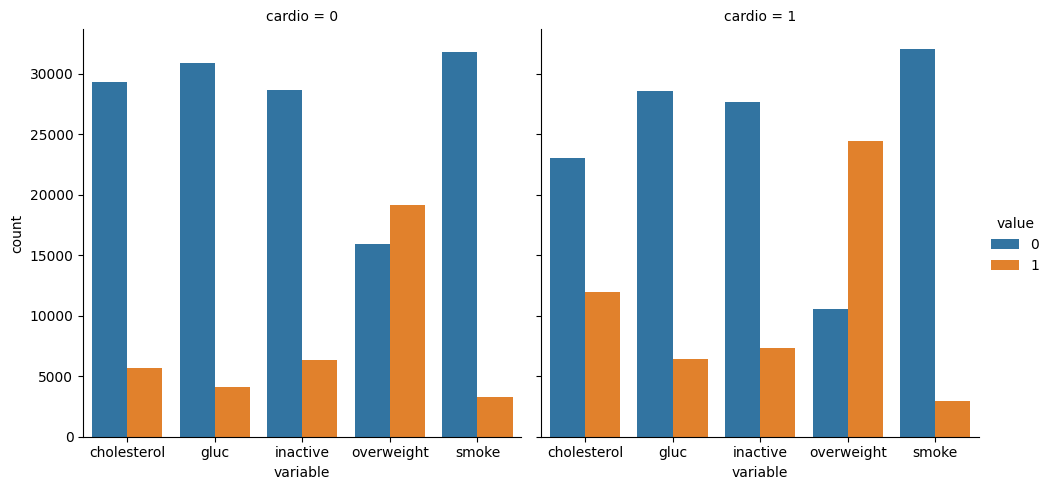

In [72]:
sns.catplot(data_cat_plot, x='variable', y='count', hue='value', kind='bar', col='cardio')